# Imports

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import numpy as np

# Preprocessing

In [2]:
(X_train, y_train), (X_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [6]:
print(X_train.shape)
print(X_train[0].shape)

(60000, 28, 28)
(28, 28)


In [10]:
X_train = X_train.reshape(-1,28,28,1).astype('float32')/255.0
X_test = X_test.reshape(-1,28,28,1).astype('float32')/255.0
y_train = tf.one_hot(y_train,10).numpy()
y_test = tf.one_hot(y_test,10).numpy()

I0000 00:00:1766905207.381283      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [13]:
print(X_train.shape)
input = X_train.shape[1:]
print(input)

(60000, 28, 28, 1)
(28, 28, 1)


# Model Creation
1. No padding used
2. Strides remain 1 (default is also 1 so doesn't matter if we write "strides =1" or not
3. MaxPooling with pool size (2,2) where strides = 2 is used

In [14]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', strides = 1, activation = 'relu', input_shape = input))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))
model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', strides = 1, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))

model.add(Flatten())

model.add(Dense(128, activation ='relu'))
model.add(Dense(10, activation = 'softmax'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,386 (442.91 KB)

 Trainable params: 113,386 (442.91 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
history = model.fit(X_train,y_train,epochs=10,batch_size=128,verbose=1,validation_split=0.1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9682 - loss: 0.1026 - val_accuracy: 0.9768 - val_loss: 0.0896
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9729 - loss: 0.0899 - val_accuracy: 0.9765 - val_loss: 0.0846
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9733 - loss: 0.0842 - val_accuracy: 0.9780 - val_loss: 0.0796
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9753 - loss: 0.0782 - val_accuracy: 0.9797 - val_loss: 0.0735
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9747 - loss: 0.0791 - val_accuracy: 0.9797 - val_loss: 0.0760
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9775 - loss: 0.0721 - val_accuracy: 0.9802 - val_loss: 0.0727
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9797 - loss: 0.0637 - val_accuracy: 0.9817 - val_loss: 0.0705
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9813 - loss: 0.0628 - val_accuracy: 0.

In [26]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9765 - loss: 0.0774


In [27]:
print(test_accuracy)
print(test_loss)

0.9801999926567078
0.06616906821727753


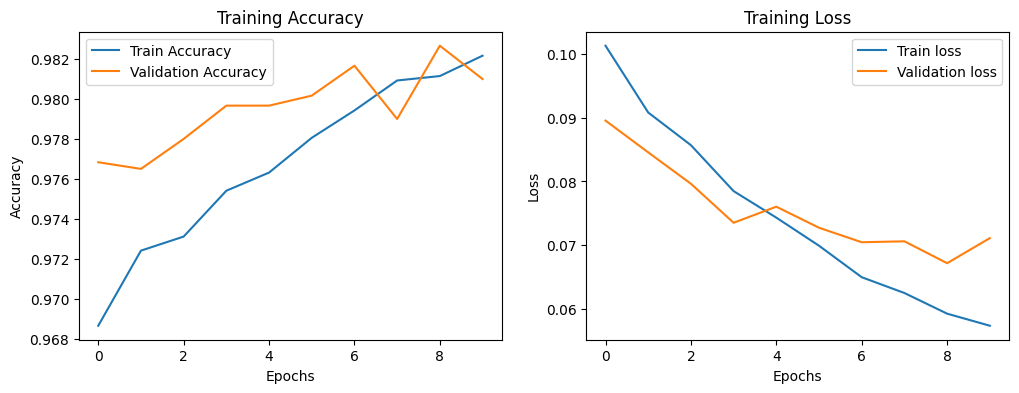

In [30]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Train loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


# Using Padding
* padding = 'same' automatically founds what number of paddings need to be used. it maintains the size of actual image. without padding, if image size (4x4) and kernel size is (3x3), feature map becomes (2x2).
* size of feature map, f = (n-m+1),(n-m+1)  | here, n is size of image, m is size of kernel
* with padding we make image sized (4x4) into (6x6) by adding zeros to extra columns and rows. This is called zero padding.
* after padding size of feature map, f = (n-m+2p+1),(n-m+2p+1) | here p denotes padding

In [31]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), padding = 'same', strides = 1, activation = 'relu', input_shape = input))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))
model.add(Conv2D(32, kernel_size = (3,3), padding = 'same', strides = 1, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))

model.add(Flatten())

model.add(Dense(128, activation ='relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])



In [32]:
model.fit(X_train,y_train,epochs=10,batch_size=128,verbose=1,validation_split=0.1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.3624 - loss: 1.8036 - val_accuracy: 0.8952 - val_loss: 0.3612
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8773 - loss: 0.4032 - val_accuracy: 0.9258 - val_loss: 0.2523
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9115 - loss: 0.2927 - val_accuracy: 0.9398 - val_loss: 0.2045
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9295 - loss: 0.2325 - val_accuracy: 0.9540 - val_loss: 0.1534
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9456 - loss: 0.1832 - val_accuracy: 0.9663 - val_loss: 0.1253
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9566 - loss: 0.1432 - val_accuracy: 0.9685 - val_loss: 0.1117
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9609 - loss: 0.1283 - val_accuracy: 0.9725 - val_loss: 0.1000
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9653 - loss: 0.1131 - val_accuracy: 0.

In [33]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9725 - loss: 0.0834


[0.07627367228269577, 0.9761000275611877]

# Using Stride = 2
* by using stride=2, now in convolution operation the kernel jumps from row to row or column to column by 2 units. This makes training fast but loss of informations as it is skipping some values. thats why accuracy came lower than padding.

In [34]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), padding = 'same', strides = 2, activation = 'relu', input_shape = input))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))
model.add(Conv2D(32, kernel_size = (3,3), padding = 'same', strides = 2, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))

model.add(Flatten())

model.add(Dense(128, activation ='relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [35]:
model.fit(X_train,y_train,epochs=10,batch_size=128,verbose=1,validation_split=0.1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.1792 - loss: 2.2054 - val_accuracy: 0.6842 - val_loss: 1.0318
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7145 - loss: 0.9039 - val_accuracy: 0.8388 - val_loss: 0.5293
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8190 - loss: 0.5783 - val_accuracy: 0.8680 - val_loss: 0.4204
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8522 - loss: 0.4811 - val_accuracy: 0.8905 - val_loss: 0.3595
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8694 - loss: 0.4199 - val_accuracy: 0.9017 - val_loss: 0.3187
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8809 - loss: 0.3746 - val_accuracy: 0.9087 - val_loss: 0.2928
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8901 - loss: 0.3492 - val_accuracy: 0.9182 - val_loss: 0.2640
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8953 - loss: 0.3269 - val_accuracy: 0.

In [36]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9079 - loss: 0.2884


[0.2548528015613556, 0.91839998960495]